In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [71]:
data = pd.read_csv(r'C:\Users\Varenie\Downloads\Births-and-deaths-Year-ended-December-2020\death2.csv', sep=",")

In [72]:
data.head()

,Period,Birth_Death,Region,Count
0,2005,Births,Northland region,2067
1,2005,Births,Auckland region,20745
2,2005,Births,Waikato region,5667
3,2005,Births,Bay of Plenty region,3771
4,2005,Births,Gisborne region,777


In [73]:
data.shape

(576, 4)

In [74]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 576


In [75]:
data.columns

Index(['Period', 'Birth_Death', 'Region', 'Count'], dtype='object')

In [76]:
data.dtypes

Period          int64
Birth_Death    object
Region         object
Count           int64
dtype: object

In [77]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Period - 0
Birth_Death - 0
Region - 0
Count - 0


In [78]:
# Основные статистические характеристки набора данных
data.describe()

,Period,Count
count,576.000000,576.000000
mean,2012.500000,5045.203125
std,4.613779,11103.855799
min,2005.000000,12.000000
25%,2008.750000,493.500000
50%,2012.500000,1591.500000
75%,2016.250000,3551.250000
max,2020.000000,64344.000000


In [79]:
# Определим уникальные значения для целевого признака
data['Period'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020], dtype=int64)

<AxesSubplot:xlabel='Period', ylabel='Count'>

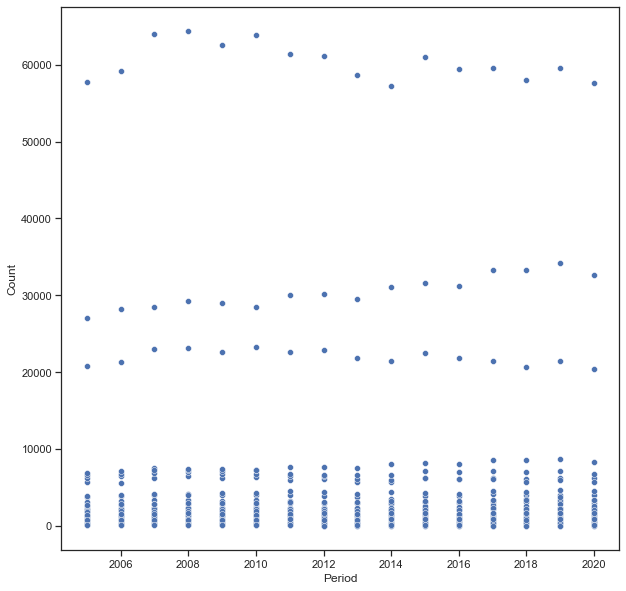

In [80]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Period', y='Count', data=data)

c:\users\varenie\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Period', ylabel='Density'>

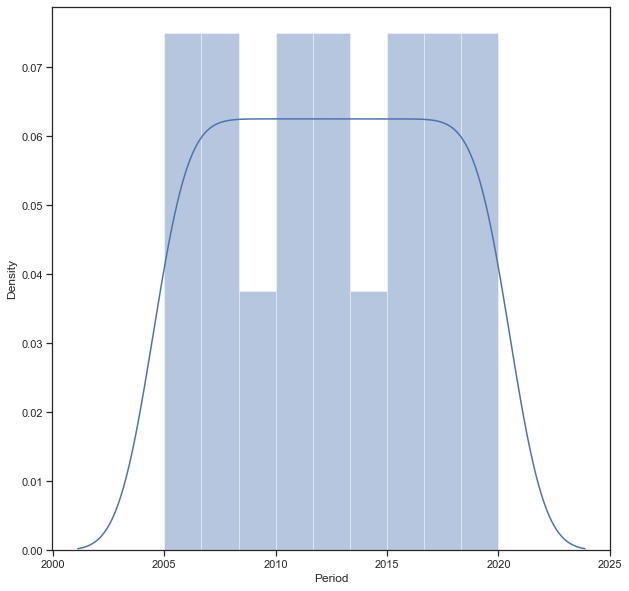

In [81]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Period'])

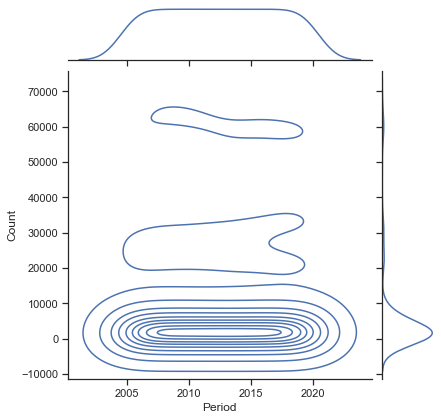

In [82]:
sns.jointplot(x='Period', y='Count', data=data, kind="kde")

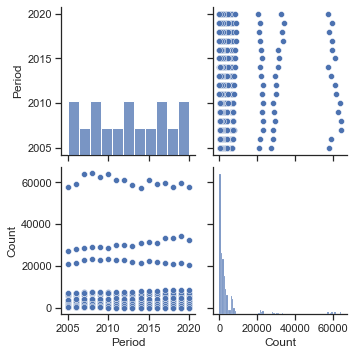

In [83]:
sns.pairplot(data)

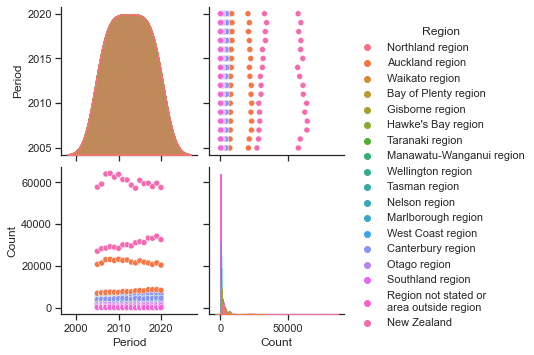

In [84]:
sns.pairplot(data, hue="Region")

<AxesSubplot:xlabel='Period', ylabel='Region'>

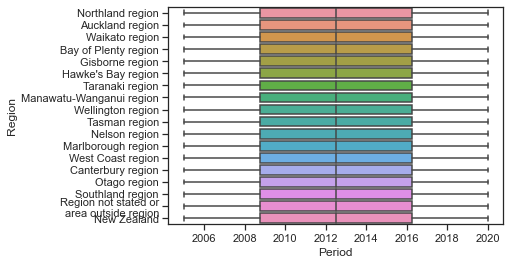

In [85]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='Period', y='Region', data=data)

<AxesSubplot:xlabel='Period'>

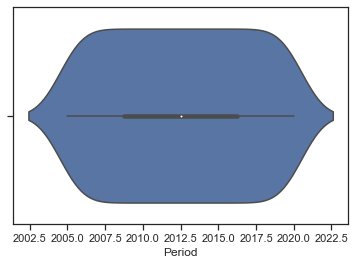

In [86]:
sns.violinplot(x=data['Period'])

c:\users\varenie\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Period', ylabel='Density'>

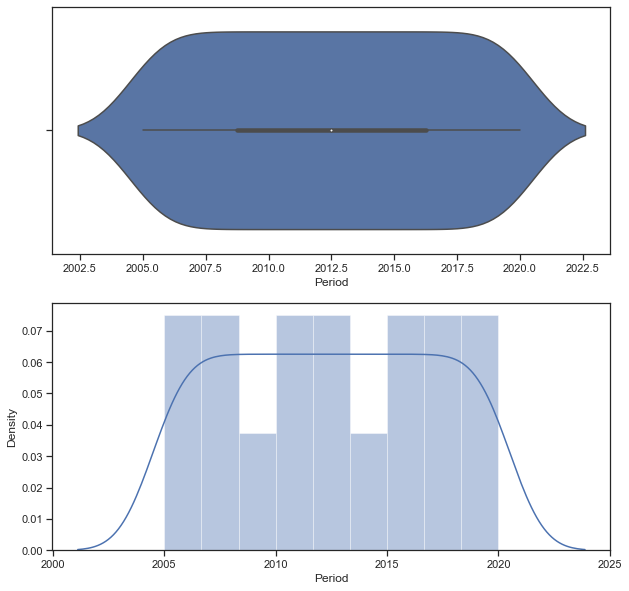

In [87]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Period'])
sns.distplot(data['Period'], ax=ax[1])

In [88]:
data.corr()

,Period,Count
Period,1.00000,0.00435
Count,0.00435,1.00000


In [89]:
data.corr(method='pearson')

,Period,Count
Period,1.00000,0.00435
Count,0.00435,1.00000


In [90]:
data.corr(method='kendall')

,Period,Count
Period,1.000000,0.011958
Count,0.011958,1.000000


In [91]:
data.corr(method='spearman')

,Period,Count
Period,1.000000,0.016311
Count,0.016311,1.000000


<AxesSubplot:>

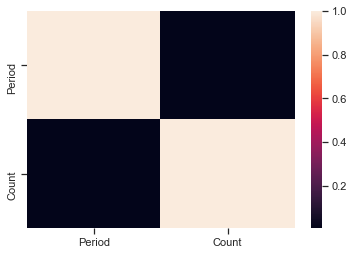

In [92]:
sns.heatmap(data.corr())

<AxesSubplot:>

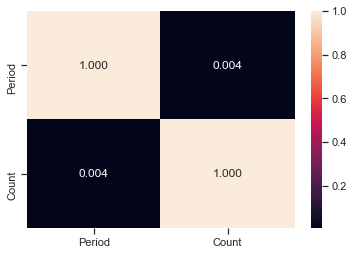

In [93]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

<AxesSubplot:>

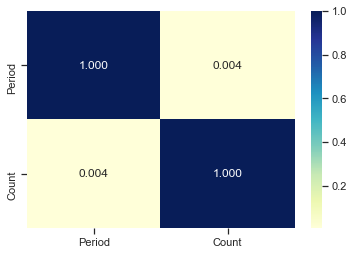

In [94]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<AxesSubplot:>

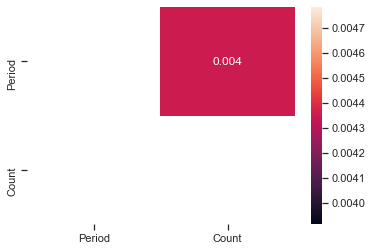

In [95]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

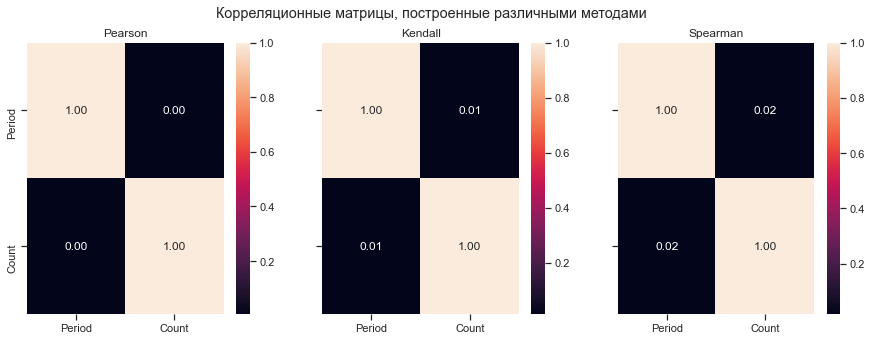

In [96]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

In [98]:
# The end.